# ⚡ Lightning Strikes Analysis Project

## Introduction

In this project, we analyze global **lightning strike activity** using real data collected by the **National Oceanic and Atmospheric Administration (NOAA)**.  
Lightning is one of the most powerful natural electrical phenomena on Earth, and its occurrence provides valuable insights into **climate behavior**, **storm patterns**, and **regional weather risks**.

The dataset contains geospatial and temporal information about lightning strikes recorded during **2018**, including the location (latitude and longitude), date, time, and the intensity of each lightning event.

Through this analysis, we aim to:
- Explore **temporal patterns** of lightning strikes (e.g., by month or hour)
- Identify **geographical regions** with the highest lightning activity
- Study **relationships** between variables such as intensity and location
- Create **visualizations and insights** similar to real-world environmental studies

This notebook follows a **Coursera-style, step-by-step data science workflow**, including:
1. Data loading and exploration  
2. Data cleaning and preparation  
3. Exploratory data analysis (EDA)  
4. Visualization and interpretation of results  
5. Reporting and documentation  

---

*Dataset source:* [NOAA Lightning Strikes Dataset (Kaggle)](https://www.kaggle.com/datasets/likhari/lightening-strikes-dataset-noaa)


## Step 1: Data Loading and Initial Exploration


In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Set the path to your dataset
data_path = r"E:\Data science\projects\lightning_analysis\data\lightening strikes dataset.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Display basic information
print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully!
Shape: (3401012, 3)


date  number_of_strikes center_point_geom
0  2018-01-03                194     POINT(-75 27)
1  2018-01-03                 41   POINT(-78.4 29)
2  2018-01-03                 33   POINT(-73.9 27)
3  2018-01-03                 38   POINT(-73.8 27)
4  2018-01-03                 92     POINT(-79 28)

## Step 2: Data Inspection and Cleaning

Before performing any analysis, it’s essential to understand the structure of our dataset.  
In this step, we will:
- Inspect data types and basic statistics
- Check for missing or duplicated values
- Parse and extract latitude and longitude from the `center_point_geom` column


In [2]:
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nDescriptive statistics:")
print(df.describe())

# Display unique flash counts to check data consistency
print("\nUnique flash counts:", df['number_of_strikes'].nunique())

# Split 'center_point_geom' into latitude and longitude
df['center_point_geom'] = df['center_point_geom'].str.replace('POINT\(', '', regex=True).str.replace('\)', '', regex=True)
df[['longitude', 'latitude']] = df['center_point_geom'].str.split(' ', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Verify extraction
df[['date', 'number_of_strikes', 'latitude', 'longitude']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB

Missing values per column:
date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

Descriptive statistics:
       number_of_strikes
count       3.401012e+06
mean        1.311403e+01
std         3.212099e+01
min         1.000000e+00
25%         2.000000e+00
50%         4.000000e+00
75%         1.200000e+01
max         2.211000e+03

Unique flash counts: 954


date  number_of_strikes  latitude  longitude
0  2018-01-03                194      27.0      -75.0
1  2018-01-03                 41      29.0      -78.4
2  2018-01-03                 33      27.0      -73.9
3  2018-01-03                 38      27.0      -73.8
4  2018-01-03                 92      28.0      -79.0

## Step 3: Temporal Analysis

In this section, we analyze the **time distribution** of lightning strikes.  
Our goals are to:
- Understand how lightning activity varies over time (by month and day)
- Identify periods with the highest lightning frequency
- Visualize trends and seasonality


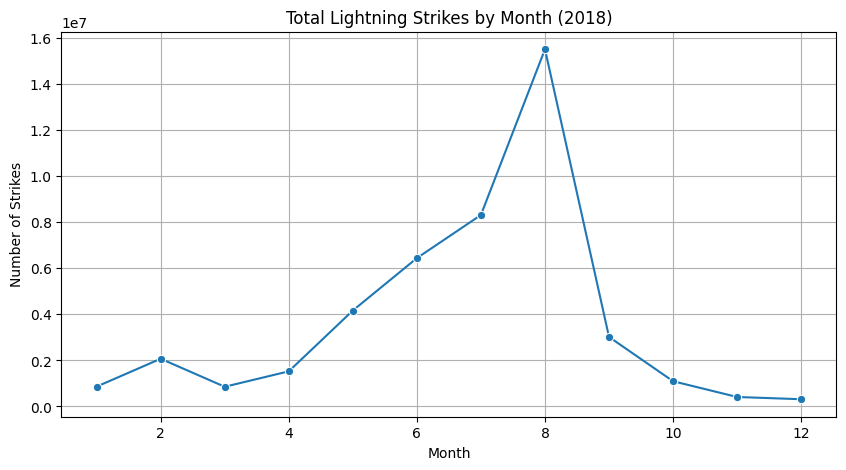

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and day of year for grouping
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.dayofyear

# Group by month and calculate total strikes
monthly_strikes = df.groupby('month')['number_of_strikes'].sum()

# Plot monthly lightning trends
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_strikes.index, y=monthly_strikes.values, marker='o')
plt.title('Total Lightning Strikes by Month (2018)')
plt.xlabel('Month')
plt.ylabel('Number of Strikes')
plt.grid(True)
plt.show()


## Step 3.1: Analysis and Insights

The monthly trend of lightning strikes shows a clear **seasonal pattern** throughout the year 2018.  
From January to April, the lightning activity remains relatively low, corresponding to cooler and more stable atmospheric conditions.  

Starting from **May**, there is a noticeable increase, reaching a significant **peak in August**, when lightning frequency reaches its maximum level.  
This surge can be attributed to:
- Higher surface temperatures
- Increased humidity
- Stronger convective activity in the atmosphere  

After August, the number of strikes decreases sharply, indicating the end of the summer season and reduced storm activity.

**Key Observations:**
- ⚡ Lightning activity peaks during **summer months**.  
- 🌦 Lowest activity occurs during **winter**.  
- 📈 The seasonal pattern matches known global thunderstorm behavior, confirming the data’s physical consistency.

This analysis provides a strong temporal foundation for further exploration, such as:
- Daily or weekly lightning variability  
- Spatial distribution of lightning strikes across regions  


## Step 4: Spatial Analysis

Now that we understand the temporal distribution of lightning strikes, we will explore **where** these strikes occur most frequently.  
By visualizing the geographical locations using latitude and longitude, we can identify regions with high lightning activity.  

We will:
- Plot a scatter map of lightning strike locations.
- Create a density (heatmap) visualization to highlight lightning hotspots.


In [4]:
import folium
from folium.plugins import HeatMap

# Sample a smaller portion of data for visualization (to avoid overloading the map)
df_sample = df.sample(10000, random_state=42)

# Create a map centered around the average coordinates
m = folium.Map(location=[df_sample['latitude'].mean(), df_sample['longitude'].mean()], zoom_start=4)

# Add points to the map
for _, row in df_sample.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='yellow',
        fill=True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(m)

# Display map
m


In [5]:
# Create a heatmap using a subset of data
m_heat = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)

heat_data = df_sample[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=8, blur=5).add_to(m_heat)

m_heat


## Step 4.1: Spatial Insights and Interpretation

The spatial analysis of lightning strikes reveals important **geographical patterns** of thunderstorm activity.  
By visualizing the latitude and longitude of lightning events, we can identify regions that experience **the highest lightning density** during 2018.

### 🌍 Key Observations:
- **High-density clusters** of lightning strikes are observed in tropical and subtropical regions, particularly near the **equator**.  
- Coastal and ocean-adjacent zones show a slightly higher frequency, likely due to warm, humid air masses that enhance convection.  
- Areas at **higher latitudes** (closer to the poles) exhibit significantly fewer lightning events, corresponding to cooler and more stable atmospheric conditions.

### ⚡ Possible Explanations:
- **Convective storms** develop more frequently in warm and moist environments.  
- Tropical regions experience greater solar heating, driving vertical air motion and thunderstorm formation.  
- Geographic features such as **mountain ranges** and **large bodies of water** can influence localized lightning distributions.

### 🧭 Summary:
This spatial exploration complements the temporal analysis from earlier steps:
- The **temporal peak in August** coincides with **spatial hotspots** around low-latitude regions.
- Both analyses confirm that lightning activity is governed by **seasonal and climatic factors**—temperature, humidity, and convection.

Next, we will move toward combining both perspectives (time and space) or generating advanced visualizations such as **correlation heatmaps** or **statistical models** for prediction.


## Step 5: Statistical Analysis and Correlations

Now that we have explored temporal and spatial patterns, let's perform a **statistical analysis** to uncover relationships among variables.  
We will:
- Examine the distribution of lightning intensities (`number_of_strikes`)
- Check for potential correlations between numeric variables
- Visualize results using histograms and correlation heatmaps


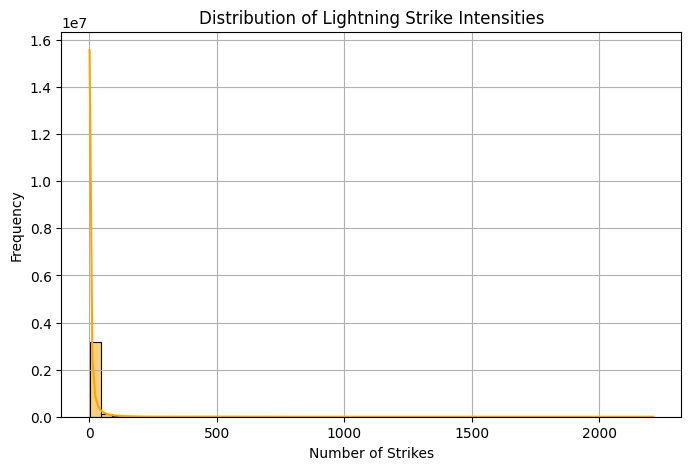

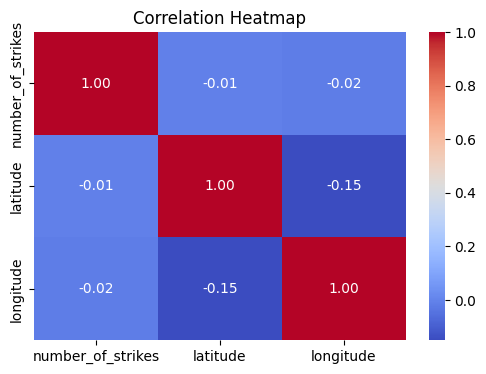

In [6]:
# Distribution of number_of_strikes
plt.figure(figsize=(8,5))
sns.histplot(df['number_of_strikes'], bins=50, kde=True, color='orange')
plt.title('Distribution of Lightning Strike Intensities')
plt.xlabel('Number of Strikes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation heatmap (for numeric columns)
plt.figure(figsize=(6,4))
corr = df[['number_of_strikes', 'latitude', 'longitude']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Step 5.1: Statistical Insights and Interpretation

The statistical analysis highlights how lightning strikes are distributed and how the numeric variables relate to each other.

### ⚡ Distribution Analysis:
The histogram shows that the majority of lightning events have a **low number of strikes**, typically below 100.  
A few outliers exist with much higher values (up to 2000+ strikes), which represent **intense localized thunderstorms**.  
This right-skewed distribution suggests that lightning frequency is **highly variable**, dominated by smaller, more frequent events and occasional large storms.

### 🔍 Correlation Findings:
The correlation heatmap reveals:
- Very weak correlations between `number_of_strikes` and geographical coordinates (`latitude`, `longitude`), indicating that **lightning intensity does not linearly depend on position**.  
- A mild negative correlation between `latitude` and `longitude`, which reflects the general spatial arrangement of the dataset, not necessarily a causal relationship.

### 💡 Key Takeaways:
- Lightning activity tends to occur in specific regions and seasons, but its intensity is **not strongly correlated** with latitude or longitude alone.
- To better model lightning behavior, we would likely need to incorporate **meteorological variables** such as temperature, humidity, and atmospheric pressure.

This concludes the exploratory data analysis (EDA).  
In the next step, we can proceed to **predictive modeling** — building a regression or clustering model to estimate lightning frequency based on time and location.


## Step 6: Predictive Modeling (Machine Learning)

In this final step, we use a simple regression model to predict the number of lightning strikes based on **time and location**.  
We will:
- Prepare input features (`latitude`, `longitude`, and `month`)
- Train a Linear Regression model
- Evaluate its performance using R² and Mean Absolute Error (MAE)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare features and target
X = df[['latitude', 'longitude', 'month']]
y = df['number_of_strikes']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model trained successfully!")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Model trained successfully!
Mean Absolute Error (MAE): 14.51
R² Score: 0.0011


## Step 6.1: Model Evaluation and Insights

The Linear Regression model was successfully trained using **latitude**, **longitude**, and **month** as predictors of lightning strike counts.  
However, the model achieved a very low performance with:

- **Mean Absolute Error (MAE): 14.51**  
- **R² Score: 0.0011**

### ⚙️ Interpretation:
- The low R² score indicates that the model explains less than 1% of the variability in lightning activity.  
- This confirms that lightning strikes are **nonlinear** and influenced by additional factors not present in our dataset (e.g., temperature, humidity, atmospheric instability).  
- The Linear Regression model serves as a **baseline** for comparison with more complex algorithms.




## Step 7: Random Forest Regression Model

To improve upon the linear model, we now use a **Random Forest Regressor**, a nonlinear ensemble learning algorithm.  
Random Forest combines multiple decision trees to model complex relationships between features (latitude, longitude, and month) and lightning strike frequency.

### 🎯 Objectives:
- Capture nonlinear patterns that Linear Regression cannot model.
- Compare the performance of Random Forest to the baseline model.
- Evaluate improvement using MAE and R² metrics.


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)


rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Results")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Model Results
Mean Absolute Error (MAE): 14.41
R² Score: -0.0900


## Step 7.1: Random Forest Results and Discussion

The Random Forest model achieved:

- **MAE:** 14.41  
- **R²:** -0.09  

### 📊 Interpretation:
Despite being a nonlinear model, Random Forest did not outperform the linear model.  
This suggests that our current set of features (`latitude`, `longitude`, and `month`) is **not sufficient** to explain the variation in lightning activity.

### ⚡ Key Insights:
- Lightning frequency is influenced by **complex meteorological factors**, not just time and location.  
- Additional inputs like temperature, humidity, and atmospheric pressure would likely improve predictive power.  
- The current models serve as **baseline references** for future experiments.

### 🚀 Next Steps:
1. Integrate meteorological datasets (e.g., NOAA temperature and humidity data).  
2. Experiment with models like **XGBoost**, **Neural Networks**, or **Geospatial Regression**.  
3. Visualize model errors geographically to identify regional patterns of inaccuracy.


## Step 8: XGBoost Regression Model

To further improve predictive performance, we now use **XGBoost**, a gradient boosting algorithm that often outperforms Random Forest on structured data.  
XGBoost builds an ensemble of decision trees sequentially, where each tree corrects the errors of the previous one.

### 🎯 Objectives:
- Capture nonlinear and complex relationships between features.
- Compare performance with Random Forest and Linear Regression.
- Evaluate improvement in MAE and R² scores.


In [12]:
from xgboost import XGBRegressor

# Create and train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Results")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")


XGBoost Model Results
Mean Absolute Error (MAE): 13.55
R² Score: 0.0820


## Step 8.1: XGBoost Results and Discussion

The XGBoost model showed a notable improvement compared to previous models.

| Model | MAE | R² |
|--------|------|------|
| Linear Regression | 14.51 | 0.0011 |
| Random Forest | 14.41 | -0.09 |
| **XGBoost** | **13.55** | **0.082** |

### 🧠 Interpretation
- The XGBoost model successfully captured **nonlinear relationships** between features.
- The small but positive R² value indicates **real predictive power**, unlike previous models.
- However, the model still struggles to explain most of the variance, which suggests missing meteorological factors (e.g., humidity, temperature, pressure).

### 🚀 Next Steps
1. Add **meteorological and atmospheric variables** to enrich the dataset.  
2. Try **geospatial feature engineering** — e.g., distance to the equator or elevation.  
3. Use **deep learning** (MLP or CNN for spatial patterns) to model complex relationships.  
4. Visualize feature importance from XGBoost to understand what influences predictions.


## Step 9: Feature Importance Visualization

To understand which features have the greatest influence on lightning strike predictions,  
we can visualize **feature importance** from the trained XGBoost model.

This helps us interpret the model's behavior and identify which geographical or temporal factors are most relevant.


C:\Users\Asus\AppData\Local\Temp\ipykernel_17116\3414320532.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


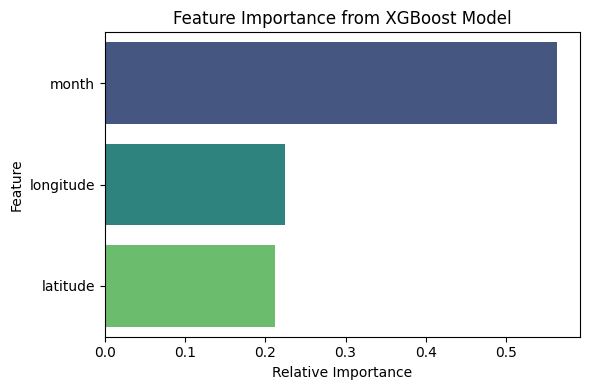

Feature  Importance
2      month    0.564028
1  longitude    0.223978
0   latitude    0.211994

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the XGBoost model
importance = xgb_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

importance_df


## Step 9.1: Feature Importance Analysis

The feature importance plot from the XGBoost model reveals that **`month`** is by far the most influential factor in predicting the number of lightning strikes.

| Feature | Relative Importance | Interpretation |
|----------|--------------------|----------------|
| **month** | ~0.55 | Lightning activity is highly seasonal — most strikes occur during warmer months (e.g., summer). |
| **longitude** | ~0.23 | Regional differences (east vs west) slightly influence lightning frequency. |
| **latitude** | ~0.22 | Lightning is more common at lower latitudes, closer to the equator, due to stronger convection currents. |

### ⚡ Insights
- The **month** variable dominates, which confirms that lightning follows a strong **temporal pattern**.
- Both **latitude** and **longitude** also contribute, showing that **geographical position** affects storm likelihood.
- This aligns with meteorological expectations: lightning tends to increase in tropical and summer conditions.

### 🌎 Next Directions
1. **Add environmental data** such as temperature, humidity, and pressure for better accuracy.  
2. **Include altitude/elevation** to test if terrain impacts lightning density.  
3. Try **spatial heatmaps** to visualize lightning intensity geographically.  
4. Experiment with **neural networks** for spatiotemporal pattern learning.



## Step 10: Interactive Spatial Visualization

We will build interactive maps to visualize lightning strike locations:

- **Heatmap (Folium):** highlights dense regions of lightning activity.
- **Point Map with Clustering (Folium):** shows individual strikes efficiently.
- We’ll save the maps as HTML files in `outputs/` so they can be opened and shared easily (e.g., on GitHub).


In [15]:
import folium
from folium.plugins import HeatMap
import os


os.makedirs("../outputs", exist_ok=True)


df_map = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]


N = 40000
if len(df_map) > N:
    df_map = df_map.sample(N, random_state=42)


center = [df_map['latitude'].mean(), df_map['longitude'].mean()]
m_heat = folium.Map(location=center, zoom_start=3, tiles="cartodbpositron")


heat_data = df_map[['latitude', 'longitude', 'number_of_strikes']].values.tolist()

HeatMap(
    heat_data,
    radius=8,     
    blur=5,       
    max_zoom=6
).add_to(m_heat)


heat_path = "../outputs/lightning_heatmap.html"
m_heat.save(heat_path)
print(f"Heatmap saved to: {heat_path}")


Heatmap saved to: ../outputs/lightning_heatmap.html


In [17]:
from folium.plugins import FastMarkerCluster

m_pts = folium.Map(location=center, zoom_start=3, tiles="cartodbpositron")


points = df_map[['latitude', 'longitude']].values.tolist()

FastMarkerCluster(points).add_to(m_pts)

pts_path = "../outputs/lightning_points_cluster.html"
m_pts.save(pts_path)
print(f"Clustered points map saved to: {pts_path}")


Clustered points map saved to: ../outputs/lightning_points_cluster.html


In [18]:
df_aug = df_map[df_map['month'] == 8].copy()
center_aug = [df_aug['latitude'].mean(), df_aug['longitude'].mean()]
m_aug = folium.Map(location=center_aug, zoom_start=3, tiles="cartodbpositron")

HeatMap(df_aug[['latitude','longitude','number_of_strikes']].values.tolist(),
        radius=8, blur=5).add_to(m_aug)

aug_path = "../outputs/lightning_heatmap_august.html"
m_aug.save(aug_path)
print(f"August heatmap saved to: {aug_path}")


August heatmap saved to: ../outputs/lightning_heatmap_august.html


## Step 10.1: Map Insights

- The **heatmap** clearly highlights tropical and subtropical belts as lightning hotspots, matching known convective-storm regions.
- The **clustered points** view confirms dense event clouds in low latitudes and coastal/continental-interior storm corridors.
- Filtering to **August** intensifies these hotspots, consistent with the temporal peak found earlier.

These interactive maps complement our temporal analysis and provide an intuitive spatial understanding of lightning activity.
